# Compare different $K_e$ estimates

Compare the different $K_e$ estimates of Abernathey & Marshall (2013), Cole et al. (2015) and ECCO

## Load data

### ECCO

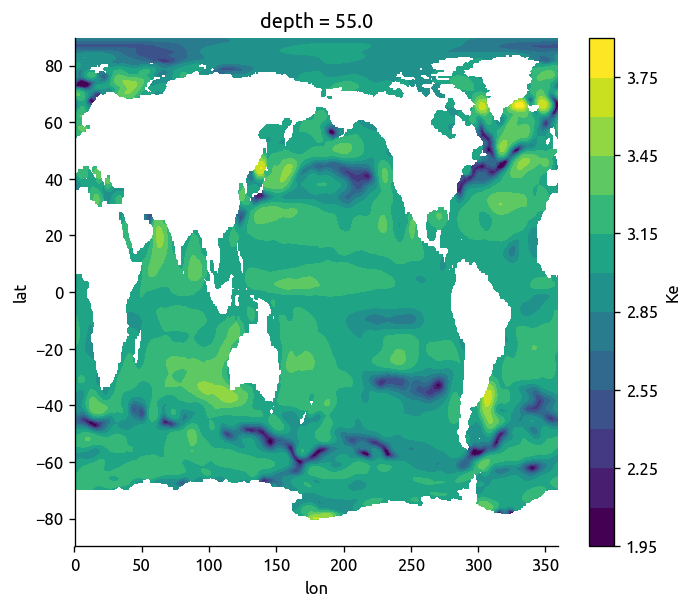

In [39]:
ecco = (xr.open_dataset('../datasets/ecco/interp_Ks_ECCOv4.nc', autoclose=True)
        .rename({'Ks_ECCOv4': 'Ke',
                 'lon':'longitude',
                 'lat':'latitude'}))
ecco['i3'].values = ecco.dep.values
ecco['i2'].values = ecco.longitude[0,:].values
ecco['i1'].values = ecco.latitude[:,0].values

ecco = ecco.rename({'i1': 'lat', 'i2': 'lon', 'i3': 'depth'}).drop(['dep'])

# roll so that pacific is in the middle and we have coverage of all 3 basins
ecco = ecco.roll(lon=-360)
ecco.lon.values[ecco.lon.values < 0] += 360

ecco

#Ke = xr.Dataset()
#Ke['ecco'] = xr.DataArray(ecco.Ks_ECCOv4.values,
#                      coords={'lon': ecco.Ks_ECCOv4.lon.sel(i1=1).values,
#                              'lat': ecco.Ks_ECCOv4.lat.sel(i2=1).values,
#                              'depth': ecco.Ks_ECCOv4.dep.values},
#                      dims=['lat', 'lon', 'depth'])
    
np.log10(ecco.Ke.sel(depth=50, method='nearest')).plot.contourf(levels=15);

### Abernathey & Marshall (2013)

/home/deepak/work/python/xarray/xarray/core/computation.py:565: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


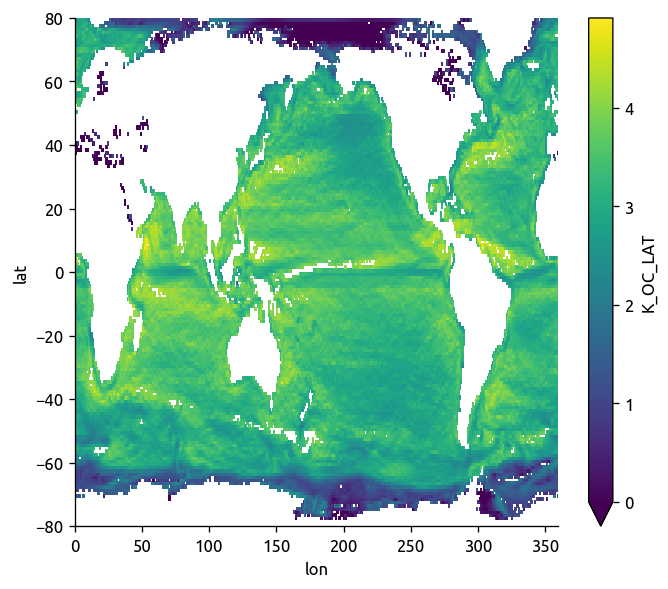

In [33]:
aber = xr.open_dataset('../datasets/diffusivity_AM2013.nc', autoclose=True)
aber

np.log10(aber.K_OC_LAT).plot(vmin=0)

### Cole et al. (2015)

/home/deepak/anaconda3/lib/python3.6/site-packages/_pytest/fixtures.py:847: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  params = attr.ib(convert=attr.converters.optional(tuple))
/home/deepak/anaconda3/lib/python3.6/site-packages/_pytest/fixtures.py:849: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  ids = attr.ib(default=None, convert=_ensure_immutable_ids)


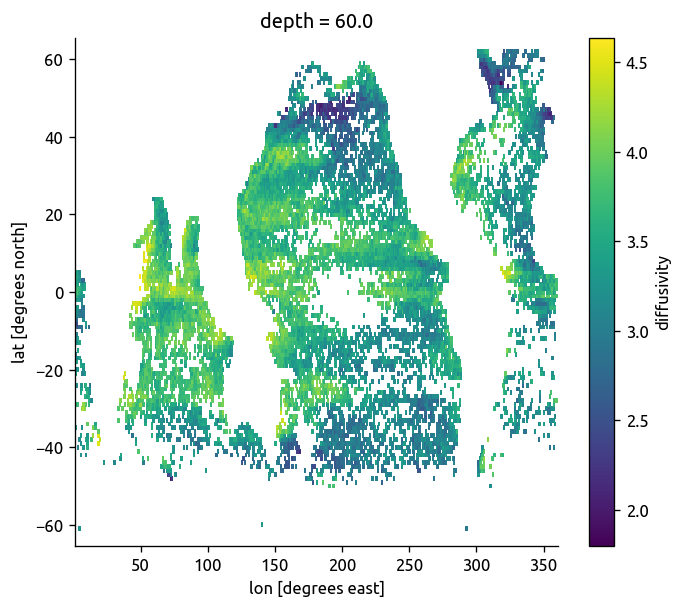

In [1]:
cole = (xr.open_dataset('../datasets/argo-diffusivity/ArgoTS_eddydiffusivity_20052015_1deg.nc', 
                        autoclose=True)
        .rename({'latitude': 'lat',
                 'longitude': 'lon',
                'density': 'sigma'})
        .set_coords(['lat', 'lon', 'sigma']))

cole['diffusivity_first'] = cole.diffusivity.bfill(dim='depth').isel(depth=0)

np.log10(cole.diffusivity.sel(depth=50, method='nearest')).plot()

## All three together

/home/deepak/work/python/xarray/xarray/core/computation.py:565: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


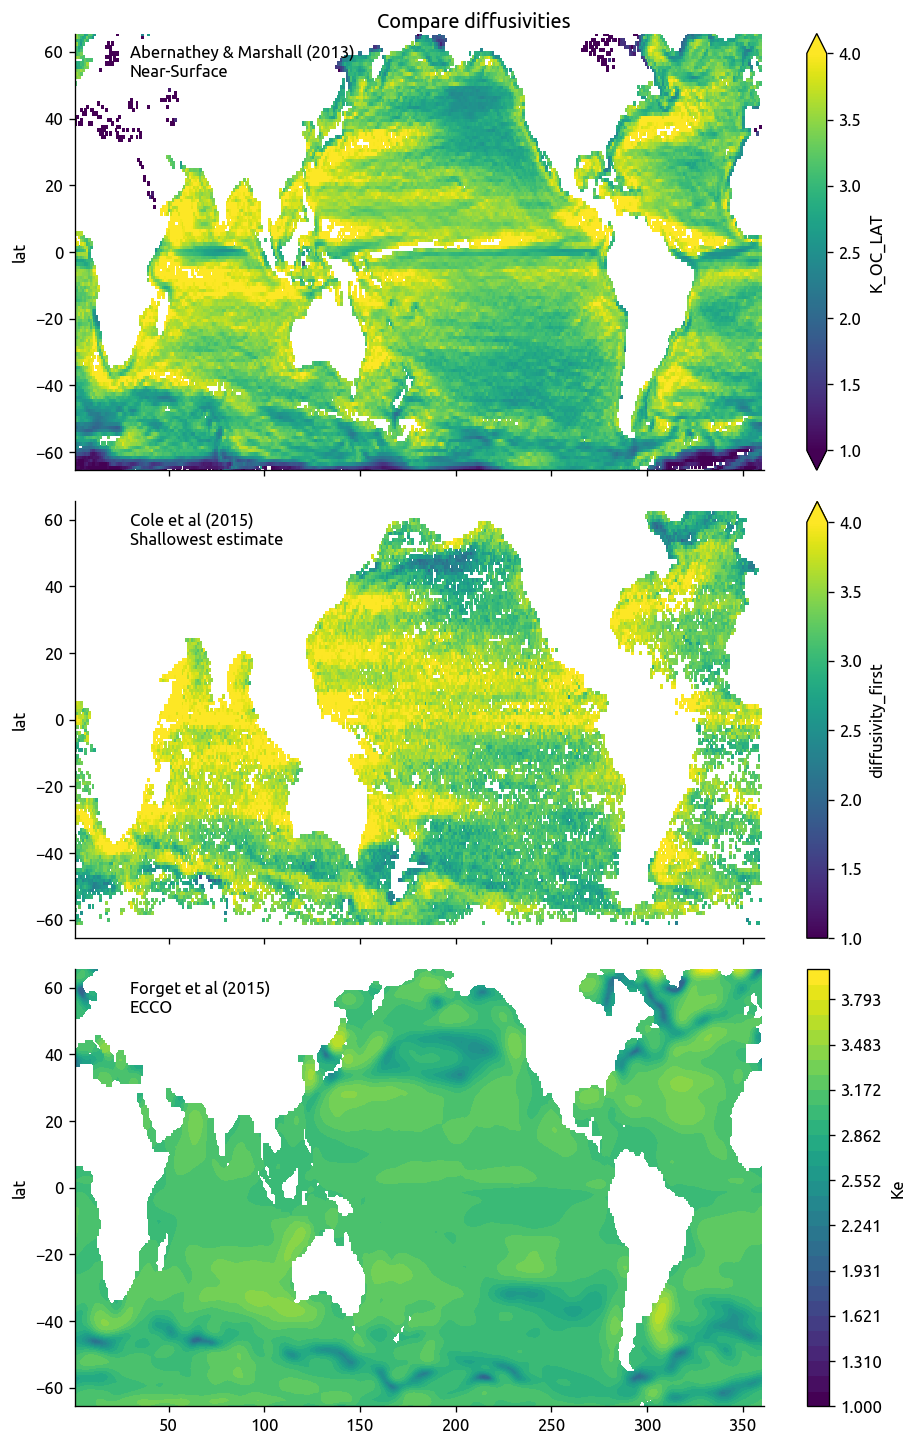

In [94]:
f,ax = plt.subplots(3,1, sharex=True, sharey=True)
f.set_size_inches(8, 12)

kwargs=dict(vmin=1, vmax=4)

np.log10(aber.K_OC_LAT).plot(ax=ax[0], **kwargs)

np.log10(cole.diffusivity_first).plot(ax=ax[1], **kwargs)

np.log10(ecco.Ke.sel(depth=0, method='nearest')).plot.contourf(ax=ax[2], 
                                                                levels=np.linspace(1,4,30),
                                                                **kwargs)

f.suptitle('Compare diffusivities', y=1)

ax[0].text(x=0.08, y=0.9, s='Abernathey & Marshall (2013) \nNear-Surface', 
           fontsize=10, transform=ax[0].transAxes)
ax[1].text(x=0.08, y=0.9, s='Cole et al (2015)\nShallowest estimate', 
           fontsize=10, transform=ax[1].transAxes)
ax[2].text(x=0.08, y=0.9, s='Forget et al (2015) \nECCO', 
           fontsize=10, transform=ax[2].transAxes)

[aa.set_xlabel('') for aa in ax]
[aa.set_title('') for aa in ax]

plt.tight_layout()

plt.savefig('../images/diff-compare-surface.png', bbox_inches='tight')